In [1]:
from wdlen import wordlenth
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Japanese/')
Davis = CHILDESCorpusReader(corpus_root, 'Miyata/.*.xml')
wdlen = wordlenth(Davis)

In [3]:
df = pd.DataFrame(wdlen).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [4]:
writer = pd.ExcelWriter('Miyata.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

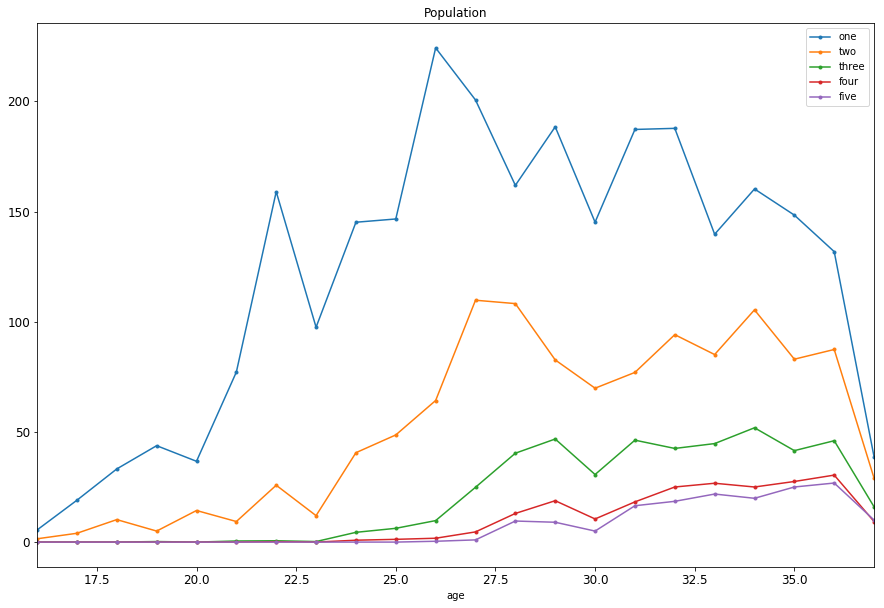

In [5]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population',  style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [6]:
df1_com = df.groupby('age').count()

In [28]:
df_age = pd.read_excel('Miyata.xlsx')

In [29]:
df2_com = df_age.groupby('age.1').count()

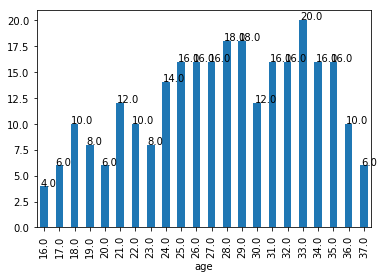

In [21]:
# Before coelescing ages
ax = df1_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

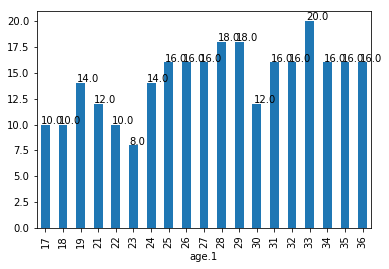

In [30]:
# After coelescing ages
ax = df2_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [31]:
df_age = df_age.drop('age', axis = 1)

In [32]:
df_ageno1 = df_age.drop('one', axis = 1)

In [33]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [34]:
df_perage = df_ageno1
df_perage.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

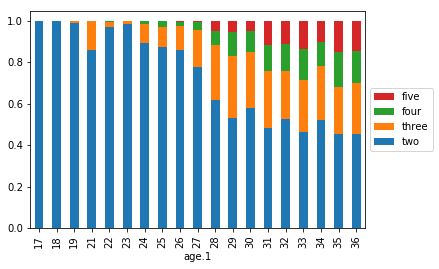

In [35]:
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()